# Hann Window

The **Hann window**, is a widely used window function in digital signal processing. It has excellent side-lobe attenuation and is especially useful in spectral analysis and FIR filter design.

There are two common versions:
- **Symmetric**: used for FIR filter design.
- **Periodic**: used in spectral analysis to avoid spectral leakage due to endpoint discontinuities.

This notebook implements both and compares their frequency responses.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Analysis parameters
M = 64  # Window length
N = 2**int(np.ceil(np.log2(M * 16)))  # FFT length
dBCut = -100  # dB clipping level

Modd = M % 2
Mo2 = (M - Modd) // 2

eps = np.finfo(float).eps  # For safe log10

## Mathematical Formulation

The Hann window is defined as:

- **Symmetric** (for FIR filter design):

$$
w[n] = 0.5 - 0.5 \cos\left( \frac{2\pi n}{M-1} \right), \quad 0 \leq n < M
$$

- **Periodic** (for spectral analysis):

$$
w[n] = 0.5 - 0.5 \cos\left( \frac{2\pi n}{M} \right), \quad 0 \leq n < M
$$

The periodic version ensures continuity when the window is extended periodically.


In [3]:
# Symmetric Hann (for FIR filters)
n = np.arange(M)
whs = 0.5 - 0.5 * np.cos(2 * np.pi * n / (M - 1))

# Periodic Hann (for spectral analysis)
n = np.arange(M + 1)
whp = 0.5 - 0.5 * np.cos(2 * np.pi * n / M)
whp = whp[:-1]  # Remove last point to make it length M


## Zero-padding and FFT

To analyze frequency content, we zero-pad the windows and compute their FFTs. Padding is performed to center the window and enhance frequency resolution.


In [4]:
# Zero-padding with center shift
whszp = np.concatenate([whs[Mo2:], np.zeros(N - M), whs[:Mo2]])
whpzp = np.concatenate([whp[Mo2:], np.zeros(N - M), whp[:Mo2]])

# FFTs
Whszp = np.fft.fft(whszp)
Whpzp = np.fft.fft(whpzp)

# Magnitudes in dB
magWhs_dB = 20 * np.log10(np.abs(Whszp) + eps)
magWhs_dB -= np.max(magWhs_dB)
magWhs_dB = np.maximum(magWhs_dB, dBCut)

magWhp_dB = 20 * np.log10(np.abs(Whpzp) + eps)
magWhp_dB -= np.max(magWhp_dB)
magWhp_dB = np.maximum(magWhp_dB, dBCut)


## Time and Frequency Domain Plots

We now compare:
- Time-domain shape of the symmetric and periodic Hann windows.
- Their frequency-domain responses.

Note: The differences are subtle in time domain, but important in applications.


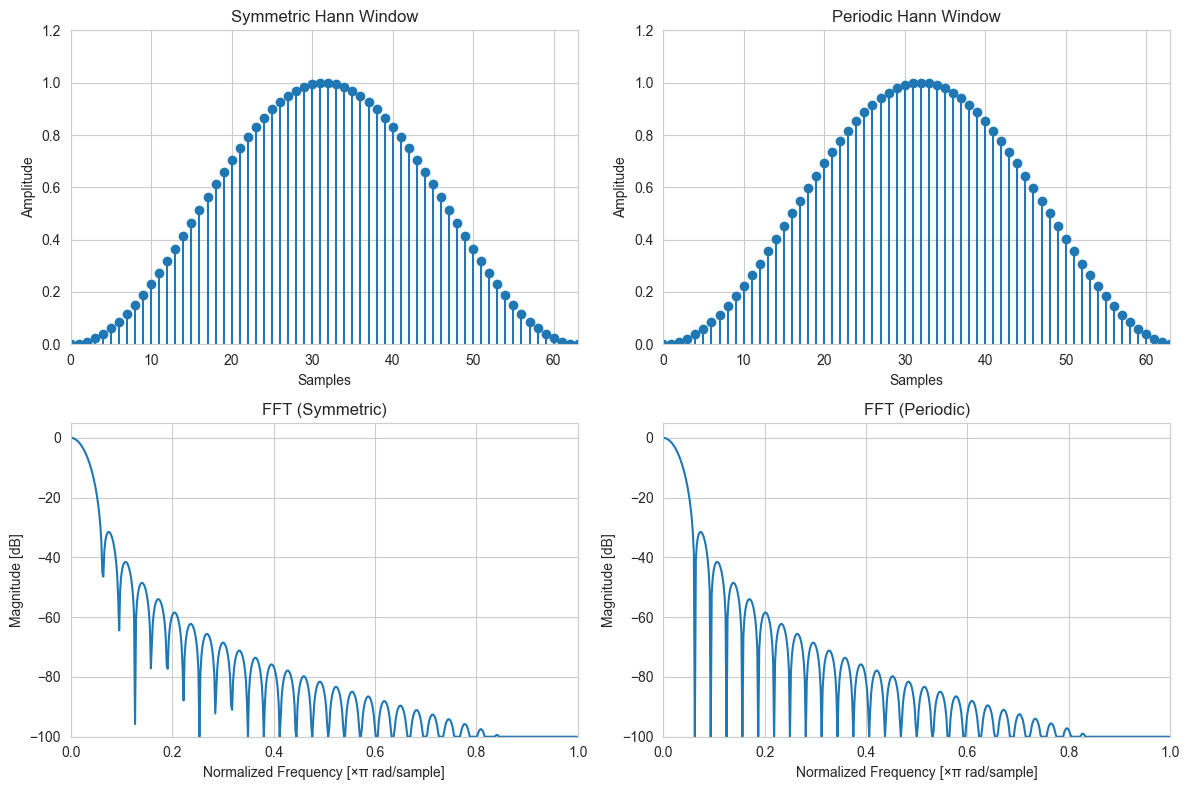

In [ ]:
# Frequency axis
nf = np.linspace(0, 2, N, endpoint=False)[:N//2]
n = np.arange(M)

plt.figure(figsize=(12, 8))

# Time-domain: symmetric
plt.subplot(2, 2, 1)
plt.stem(n, whs, basefmt=" ")
plt.title('Symmetric Hann Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M-1)
plt.ylim(0, 1.2)
plt.grid(True)

# Time-domain: periodic
plt.subplot(2, 2, 2)
plt.stem(n, whp, basefmt=" ")
plt.title('Periodic Hann Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M-1)
plt.ylim(0, 1.2)
plt.grid(True)

# Frequency-domain: symmetric
plt.subplot(2, 2, 3)
plt.plot(nf, magWhs_dB[:N//2])
plt.title('FFT (Symmetric)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, 1)
plt.ylim(dBCut, 5)
plt.grid(True)

# Frequency-domain: periodic
plt.subplot(2, 2, 4)
plt.plot(nf, magWhp_dB[:N//2])
plt.title('FFT (Periodic)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, 1)
plt.ylim(dBCut, 5)
plt.grid(True)

plt.tight_layout()
plt.show()


## Conclusion

Both versions of the Hann window are similar in shape but are used in different contexts:

| Version     | Application               | Discontinuity Handling         |
|-------------|----------------------------|--------------------------------|
| Symmetric   | FIR filter design          | Allows for exact symmetry      |
| Periodic    | Spectral analysis (e.g., STFT) | Prevents discontinuities when periodic |

The frequency response of the Hann window shows excellent side-lobe suppression, making it ideal for applications requiring clean spectral analysis.
